In [6]:
# Generic Setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipy.notebooks.session_data.dev.features import define_feature

import pylab
pylab.rcParams['figure.figsize'] = (12,8)  # set default plot size but not working below

In [7]:
# Notebook specific setup
datadir = '/Users/dane/data/a/tlm/features/'

In [9]:
define_feature.explain()

HB_aplac_b              - Uses Aplac HB simulator
HB_legacy_b             - Uses legacy HB simulator
add_measurement_b       - Add measurement
add_mwo_elem_b          - Add MWO element
add_sim_doc_b           - Add Simulation Document
add_vss_elem_b          - Add VSS element
ana_doc_b               - Has Analyst document
ana_sim_n               - Analyst simulation count
annotation_b            - Adding annotations
antenna_b               - Antennas
bindkeys_b              - Customize bindkeys
board_import_b          - PCB Import
cell_stretchers_b       - Cell Stretchers
commands_n              - Number of commands executed
create_process_b        - Create new process
doc_sets_b              - Document Sets
drc_b                   - DRC checks
ele_created_n           - Number of elements created
em_sim_b                - Has EM simulation
ems_doc_b               - Has EMSight document
ems_highcnt_b           - Sessions with large EMSight sim counts
ems_sim_n               - EMSight si

In [10]:
fn = datadir + 'featured_user_weeks.csv'
print('reading', fn)
df = pd.read_csv(fn, encoding='latin1')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.iloc[0]

reading /Users/dane/data/a/tlm/features/featured_user_weeks.csv


HB_aplac_b                                                1
HB_legacy_b                                               0
add_measurement_b                                         1
add_mwo_elem_b                                            1
add_sim_doc_b                                             1
add_vss_elem_b                                            0
ana_doc_b                                                 1
ana_sim_n                                                84
annotation_b                                              0
antenna_b                                                 0
bindkeys_b                                                0
board_import_b                                            0
cell_stretchers_b                                         0
commands_n                                             1973
company                    National Instruments - AWR Group
create_process_b                                          1
disp_name                               

In [11]:
# reorder columns
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('company')))
cols.insert(0, cols.pop(cols.index('user_type')))
cols.insert(0, cols.pop(cols.index('disp_name')))
cols.insert(0, cols.pop(cols.index('week')))
df = df[cols]
df.iloc[0]

week                                                    644
disp_name                                    Christian Bean
user_type                                          internal
company                    National Instruments - AWR Group
HB_aplac_b                                                1
HB_legacy_b                                               0
add_measurement_b                                         1
add_mwo_elem_b                                            1
add_sim_doc_b                                             1
add_vss_elem_b                                            0
ana_doc_b                                                 1
ana_sim_n                                                84
annotation_b                                              0
antenna_b                                                 0
bindkeys_b                                                0
board_import_b                                            0
cell_stretchers_b                       

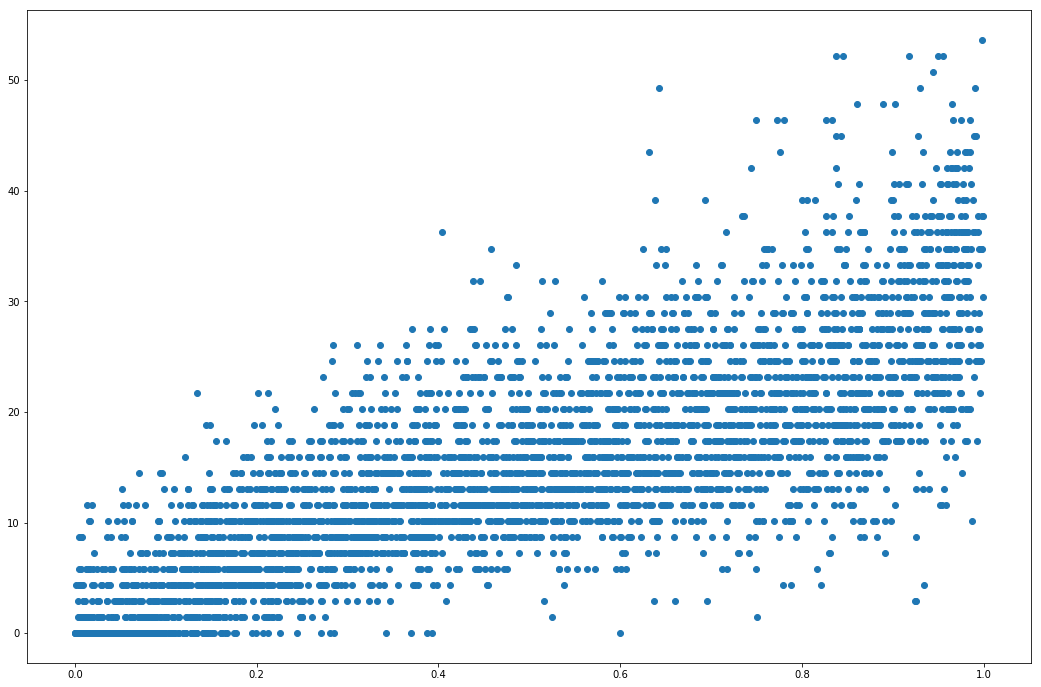

In [11]:
demo = df[df.user_type=='demo']
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.scatter(demo.activity, demo.scope)

## New Activity Metric

The goal is to find an activity metric that has more of a normal distribution.  The current activity score, since it is rank based, has a uniform distribution.  In addition, it would be good for the activity metric to contain more than just the number of commands.  Work has been done on this previously where I learned that:

* If you use counts, you just take the log due to the large range of values.
* Some attributes have very high counts due to automation (like optimization) and should be clipped

Other assumptions:

* Boolean features should not contribute to the activity score


In [14]:
# remove boolean feature columns

features = [x for x in df.columns if x[-1] != 'b']
scoring_df = df[features]

In [15]:
scoring_df.head()

,week,disp_name,user_type,company,ana_sim_n,commands_n,ele_created_n,ems_sim_n,insert_window,lin_sim_n,measurements_n,nonlin_sim_n,user_id,vss_sim_n,xem_sim_n,activity,scope
0,644,Christian Bean,internal,National Instruments - AWR Group,84,1973,143,1282,0,204,14,1,190,3,0,0.958596,36.231884
1,645,Christian Bean,internal,National Instruments - AWR Group,1,274,59,0,0,5,43,0,190,3,15,0.695941,30.434783
2,646,Christian Bean,internal,National Instruments - AWR Group,1,728,261,0,0,65,40,0,190,46,6,0.856517,39.130435
3,647,Christian Bean,internal,National Instruments - AWR Group,0,14,2,0,0,0,2,0,190,0,0,0.232641,11.594203
4,648,Christian Bean,internal,National Instruments - AWR Group,0,103,5,0,0,173,8,2,190,1,1,0.507954,34.782609


In [17]:
scoring_df.describe()

,week,ana_sim_n,commands_n,ele_created_n,ems_sim_n,insert_window,lin_sim_n,measurements_n,nonlin_sim_n,user_id,vss_sim_n,xem_sim_n,activity,scope
count,72602.000000,72602.000000,72602.000000,7.260200e+04,72602.000000,72602.000000,7.260200e+04,72602.000000,7.260200e+04,72602.000000,72602.000000,72602.000000,72602.000000,72602.000000
mean,775.819358,1.687378,400.881215,1.214270e+03,18.247459,0.002328,2.004085e+05,6.371863,1.377870e+03,7692.970497,15.422302,21.193535,0.500000,14.161625
std,45.618889,45.679728,1098.331782,4.871862e+04,522.505335,0.048191,1.187781e+07,9.529103,3.019777e+04,5218.335058,709.226143,360.839910,0.288681,9.862529
min,644.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,190.000000,0.000000,0.000000,0.000000,0.000000
25%,736.000000,0.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,1973.000000,0.000000,0.000000,0.250000,7.246377
50%,802.000000,0.000000,99.000000,1.300000e+01,0.000000,0.000000,1.600000e+01,3.000000,0.000000e+00,8444.000000,0.000000,0.000000,0.500000,13.043478
75%,817.000000,0.000000,370.000000,8.900000e+01,0.000000,0.000000,9.960000e+02,8.000000,0.000000e+00,12135.000000,0.000000,0.000000,0.750000,18.840580
max,834.000000,7626.000000,117475.000000,1.011435e+07,44621.000000,1.000000,2.469076e+09,176.000000,3.028014e+06,16923.000000,137347.000000,35119.000000,1.000000,78.260870


### Number of Commands

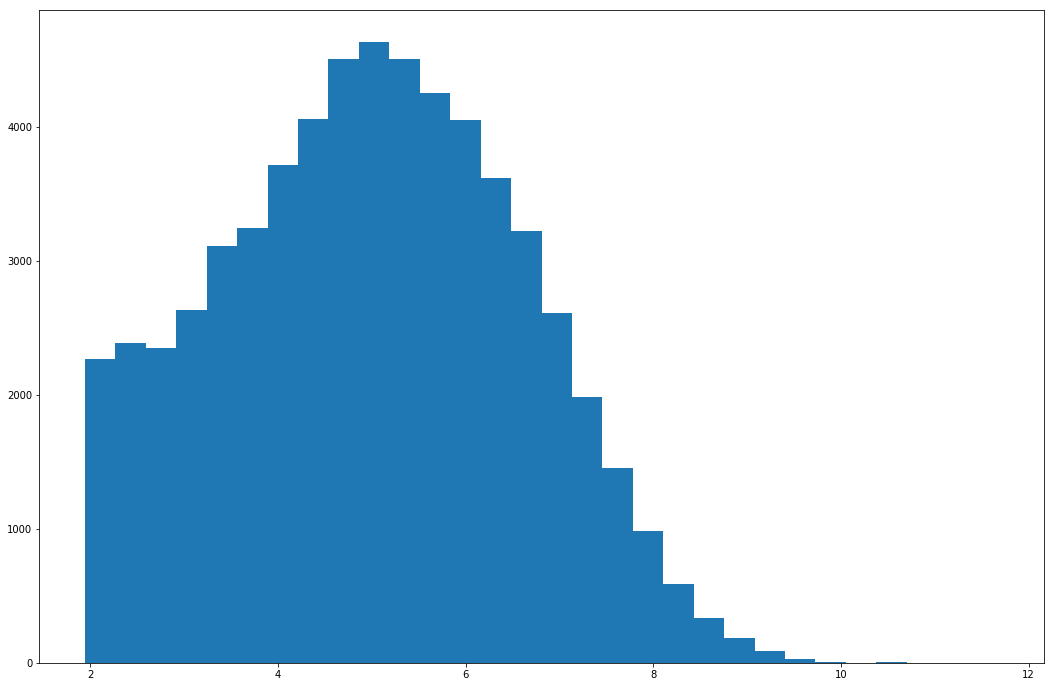

In [84]:
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.hist(scoring_df[scoring_df.commands_n > 6].commands_n.apply(np.log), bins=30);

In [86]:
scoring_df[scoring_df.commands_n > 5].commands_n.apply(np.log).describe()

count    61814.000000
mean         4.946108
std          1.618454
min          1.791759
25%          3.737670
50%          4.976734
75%          6.135565
max         11.673981
Name: commands_n, dtype: float64

The mean and median match pretty close so for this it looks like we could use a normal distribution of:

* mean = 4.946
* st dev = 1.618

to define the log(commands_n)

### Number of Simulations

In [120]:
features = [x for x in scoring_df.columns if x[-1] != 'b']
sim_df = scoring_df[features]
sim_df['sim'] = sim_df.ana_sim_n +  sim_df.xem_sim_n + sim_df.vss_sim_n + sim_df.ems_sim_n + sim_df.lin_sim_n + sim_df.nonlin_sim_n
df['sim'] = df.ana_sim_n +  df.xem_sim_n + df.vss_sim_n + df.ems_sim_n + df.lin_sim_n + df.nonlin_sim_n
sim_df.head()

,week,disp_name,user_type,company,ana_sim_n,commands_n,ele_created_n,ems_sim_n,insert_window,lin_sim_n,measurements_n,nonlin_sim_n,user_id,vss_sim_n,xem_sim_n,activity,scope,sim
0,644,Christian Bean,internal,National Instruments - AWR Group,84,1973,143,1282,0,204,14,1,190,3,0,0.958596,36.231884,1574
1,645,Christian Bean,internal,National Instruments - AWR Group,1,274,59,0,0,5,43,0,190,3,15,0.695941,30.434783,24
2,646,Christian Bean,internal,National Instruments - AWR Group,1,728,261,0,0,65,40,0,190,46,6,0.856517,39.130435,118
3,647,Christian Bean,internal,National Instruments - AWR Group,0,14,2,0,0,0,2,0,190,0,0,0.232641,11.594203,0
4,648,Christian Bean,internal,National Instruments - AWR Group,0,103,5,0,0,173,8,2,190,1,1,0.507954,34.782609,177


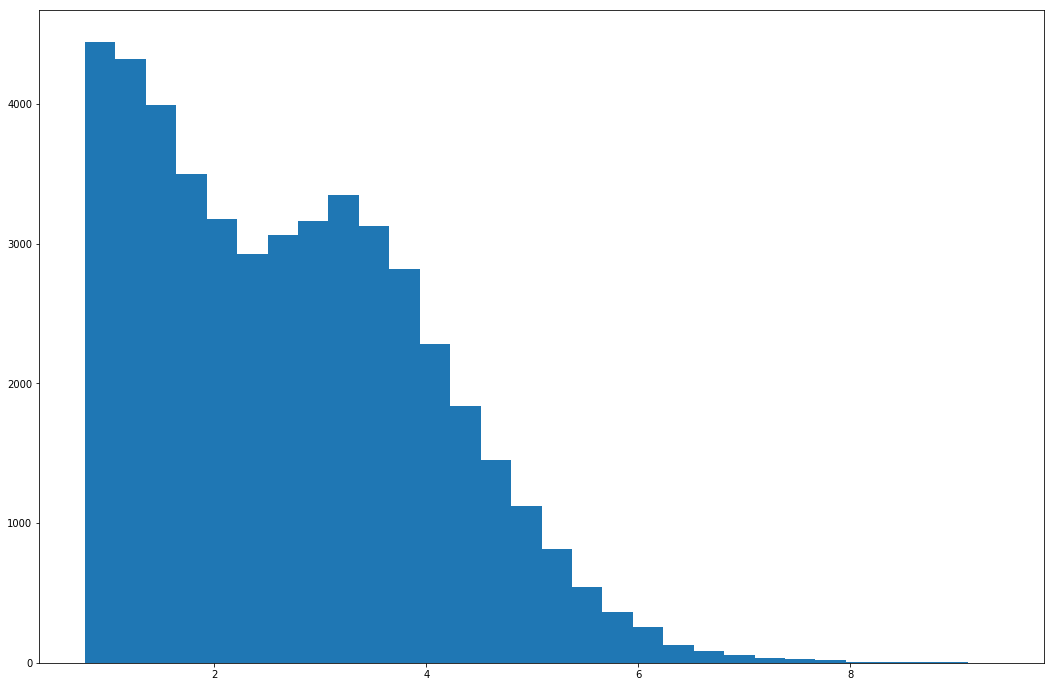

In [113]:
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.hist(sim_df[sim_df.sim > 5].sim.apply(np.log10), bins=30);

In [119]:
sim_df[sim_df.sim > 5].sim.apply(lambda x: np.log10(x) if x>0 else 0).describe()

count    46950.000000
mean         2.722333
std          1.339165
min          0.778151
25%          1.556303
50%          2.602060
75%          3.662475
max          9.392534
Name: sim, dtype: float64

Looking at this data it seems that it is too skewed by optimization with a huge number of sessions having a simulation count that is clearly automated.  I think it's best to not use number of simulations but if we were to use it we would use:

* mean = 2.72
* sigma = 1.34

### Number of Elements Created

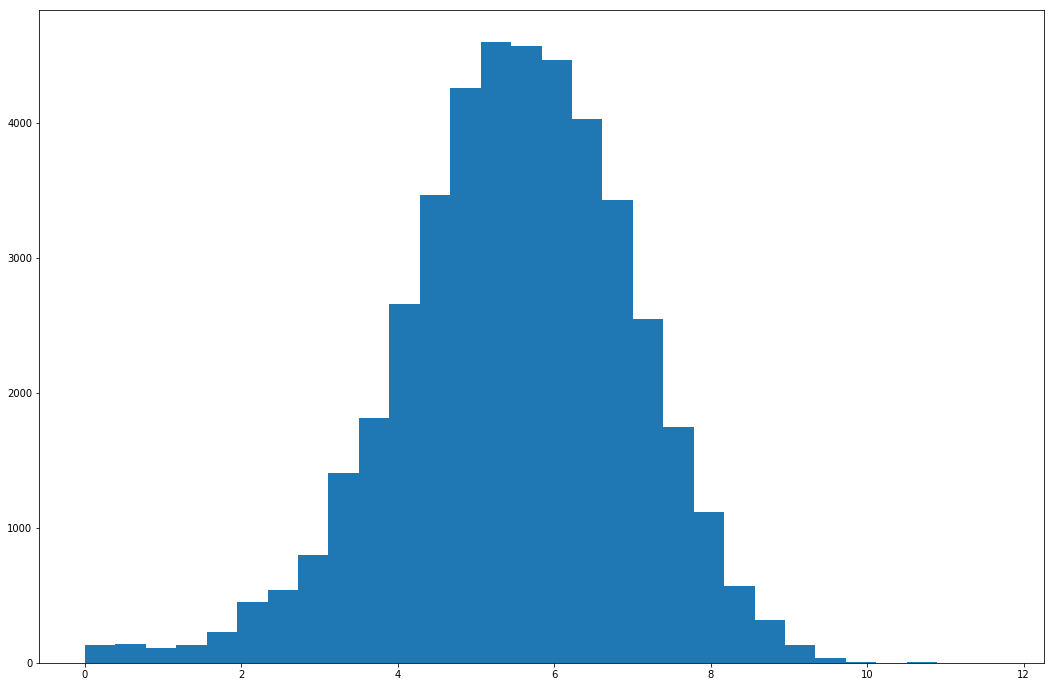

In [101]:
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.hist(scoring_df[scoring_df.ele_created_n > 4].commands_n.apply(np.log), bins=30);

In [123]:
scoring_df[scoring_df.ele_created_n > 4].ele_created_n.apply(np.log).describe()

count    43716.000000
mean         4.369218
std          1.876434
min          1.609438
25%          2.944439
50%          4.060443
75%          5.468060
max         16.129465
Name: ele_created_n, dtype: float64

This looks reasonably normal and we could use this with the following parameters for the log(ele_created_n):

* mean = 4.37
* st. dev = 1.88

### Analysis

Let's pull together these 3 parameters and look at them

In [129]:
def minlog(x, m=1, log_fn=np.log):
    """ log function with a minimum threshold """
    return log_fn(x) if x >= m else 0

score_df = df[['sim', 'ele_created_n', 'commands_n', 'week', 'user_type', 'disp_name', 'company', 'activity', 'scope', 'user_id']].copy()
score_df['lsim'] = score_df.sim.apply(lambda x: minlog(x, m=5, log_fn=np.log10))
score_df['lele'] = score_df.ele_created_n.apply(minlog)
score_df['lcmd'] = score_df.commands_n.apply(minlog)
score_df.head()

,sim,ele_created_n,commands_n,week,user_type,disp_name,company,activity,scope,user_id,lsim,lele,lcmd
0,1574,143,1973,644,internal,Christian Bean,National Instruments - AWR Group,0.958596,36.231884,190,3.197005,4.962845,7.587311
1,24,59,274,645,internal,Christian Bean,National Instruments - AWR Group,0.695941,30.434783,190,1.380211,4.077537,5.613128
2,118,261,728,646,internal,Christian Bean,National Instruments - AWR Group,0.856517,39.130435,190,2.071882,5.564520,6.590301
3,0,2,14,647,internal,Christian Bean,National Instruments - AWR Group,0.232641,11.594203,190,0.000000,0.693147,2.639057
4,177,5,103,648,internal,Christian Bean,National Instruments - AWR Group,0.507954,34.782609,190,2.247973,1.609438,4.634729


Compute the percentile of each category and also an average

In [130]:
import scipy.stats as st

In [131]:
score_df['pct_sim'] = score_df.lsim.apply(lambda x: st.norm.cdf(x, loc=2.74, scale=1.34))
score_df['pct_ele'] = score_df.lele.apply(lambda x: st.norm.cdf(x, loc=4.37, scale=1.88))
score_df['pct_cmd'] = score_df.lcmd.apply(lambda x: st.norm.cdf(x, loc=4.95, scale=1.62))
score_df.head(20)

,sim,ele_created_n,commands_n,week,user_type,disp_name,company,activity,scope,user_id,lsim,lele,lcmd,pct_sim,pct_ele,pct_cmd
0,1574,143,1973,644,internal,Christian Bean,National Instruments - AWR Group,0.958596,36.231884,190,3.197005,4.962845,7.587311,0.633466,0.623749,0.948234
1,24,59,274,645,internal,Christian Bean,National Instruments - AWR Group,0.695941,30.434783,190,1.380211,4.077537,5.613128,0.155108,0.438188,0.658854
2,118,261,728,646,internal,Christian Bean,National Instruments - AWR Group,0.856517,39.130435,190,2.071882,5.564520,6.590301,0.309032,0.737411,0.844358
3,0,2,14,647,internal,Christian Bean,National Instruments - AWR Group,0.232641,11.594203,190,0.000000,0.693147,2.639057,0.020438,0.025246,0.076861
4,177,5,103,648,internal,Christian Bean,National Instruments - AWR Group,0.507954,34.782609,190,2.247973,1.609438,4.634729,0.356741,0.071000,0.422848
5,120,0,532,649,internal,Christian Bean,National Instruments - AWR Group,0.810168,15.942029,190,2.079181,0.000000,6.276643,0.310954,0.010050,0.793583
6,992,5,477,650,internal,Christian Bean,National Instruments - AWR Group,0.792771,20.289855,190,2.996512,1.609438,6.167516,0.575904,0.071000,0.773840
7,28,0,50,651,internal,Christian Bean,National Instruments - AWR Group,0.388411,11.594203,190,1.447158,0.000000,3.912023,0.167321,0.010050,0.260850
8,56,0,248,652,internal,Christian Bean,National Instruments - AWR Group,0.678214,11.594203,190,1.748188,0.000000,5.513429,0.229602,0.010050,0.636003
9,100,79,433,701,internal,Christian Bean,National Instruments - AWR Group,0.776477,26.086957,190,2.000000,4.369448,6.070738,0.290392,0.499883,0.755473


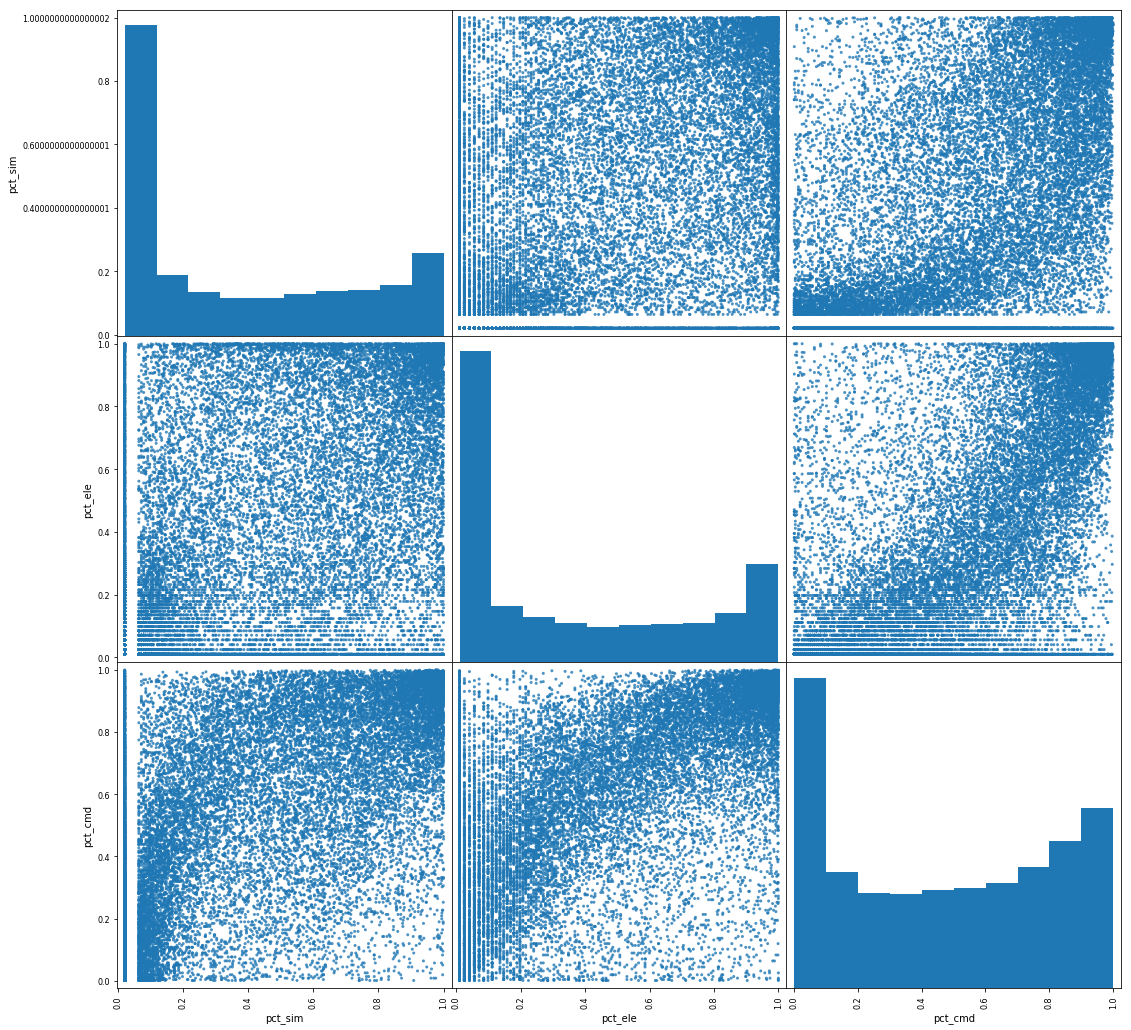

In [140]:
pd.plotting.scatter_matrix(score_df[['pct_sim', 'pct_ele', 'pct_cmd']][score_df.user_type=='customer'], alpha=0.8, figsize=(18,18));

While there are clear patterns here, it seems that it makes sense to use all three of these parameters and average them to get a new score and compare that to the old score.

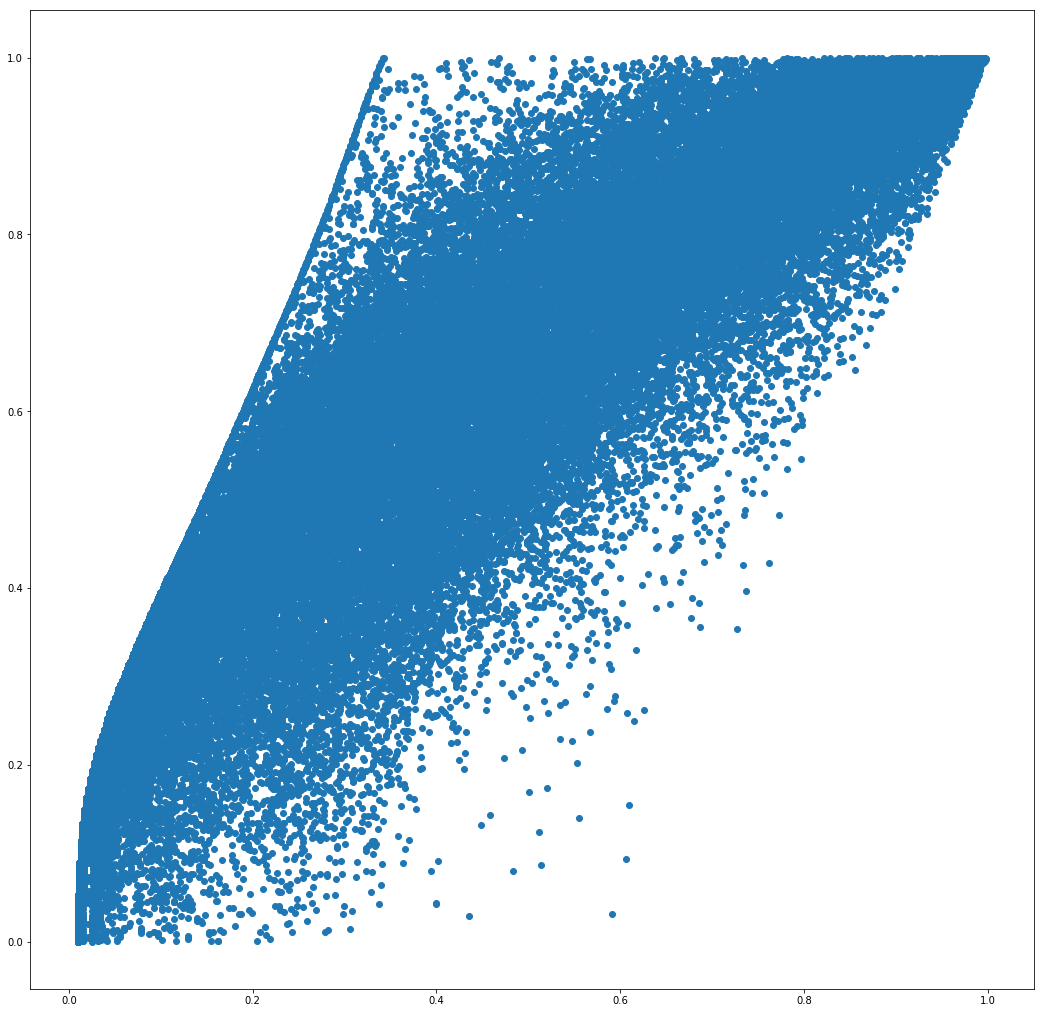

In [144]:
score_df['new_activity'] = (score_df.pct_ele + score_df.pct_cmd + score_df.pct_sim) / 3.0
fig = plt.gcf()
fig.set_size_inches(18,18)
plt.scatter(x=score_df.new_activity, y=score_df.activity);

The new measure seems to produce a lower overall activity score but still trends well enough with the old data that it seems reasonable.

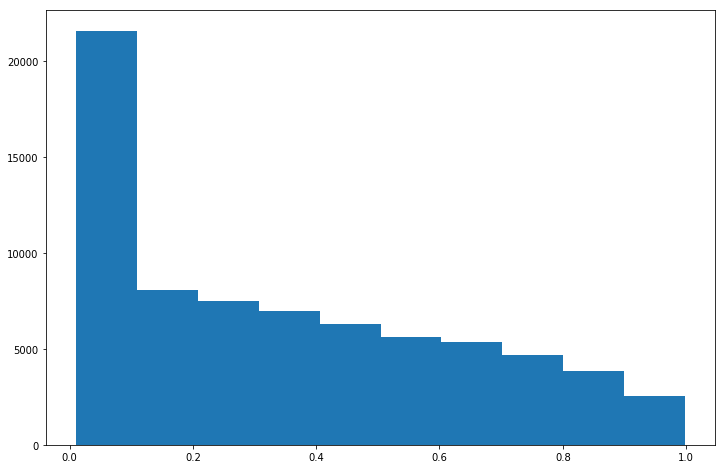

In [161]:
plt.hist(score_df.new_activity);

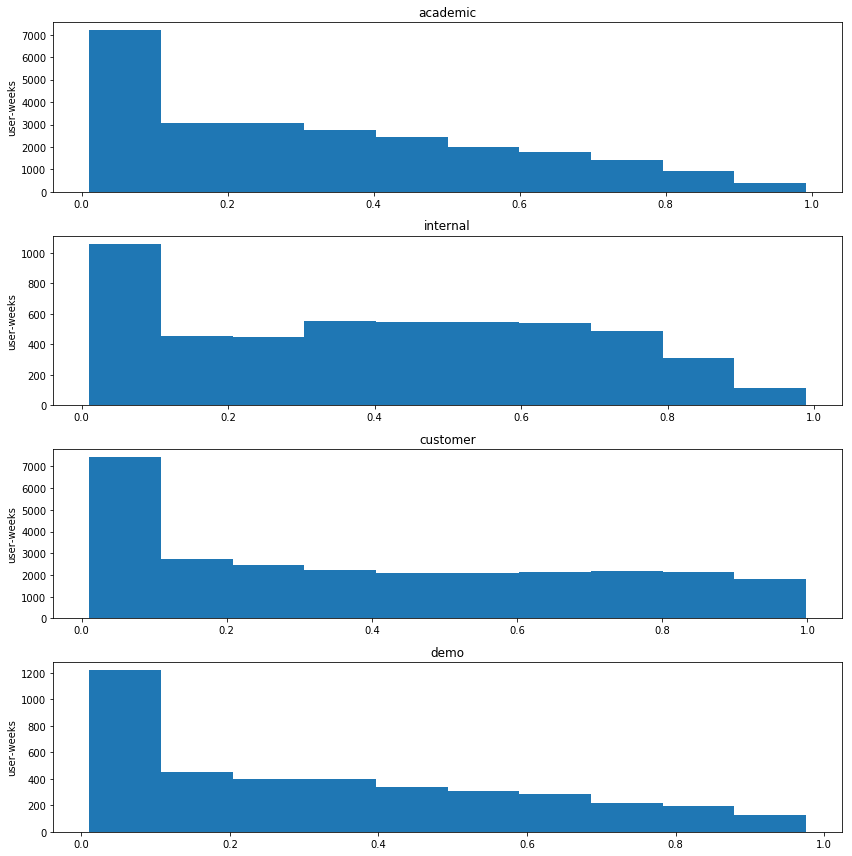

In [162]:
plt.figure(1, figsize=(12,12))
for sp, typ in enumerate(['academic', 'internal', 'customer', 'demo'], 1):
    plt.subplot(4,1,sp) # numrows, numcols, fignum
    plt.tight_layout()      ##### this create more space between graphs
    plt.title(typ)
    plt.hist(score_df[score_df.user_type == typ].new_activity)
    plt.ylabel('user-weeks')
plt.show();

In [150]:
score_df.user_type.unique()

array(['internal', 'customer', 'licensed', 'academic', 'demo', 'pirate',
       'loan', 'unknown'], dtype=object)

In [155]:
typ = 'academic'
score_df[score_df.user_type == typ].new_activity

4409     0.042051
4410     0.011596
4411     0.813587
4412     0.682275
4413     0.185189
4414     0.034423
4415     0.219777
4416     0.291186
4417     0.277754
4418     0.018702
4419     0.094406
4420     0.327253
5713     0.433061
5714     0.498763
6560     0.683942
6561     0.181089
6562     0.869071
6563     0.011596
6564     0.055837
6565     0.212586
6566     0.183613
6567     0.060902
6568     0.013069
6569     0.698023
6570     0.199877
6571     0.611890
6572     0.404263
6573     0.184522
6574     0.719664
6575     0.322522
           ...   
72520    0.188477
72521    0.147095
72522    0.139603
72523    0.118080
72524    0.102883
72526    0.038296
72527    0.138461
72530    0.190838
72536    0.149224
72539    0.010537
72540    0.010537
72551    0.010537
72552    0.338783
72555    0.013069
72559    0.080379
72560    0.021762
72575    0.332996
72576    0.819070
72578    0.466708
72584    0.168165
72585    0.035783
72586    0.010537
72587    0.011596
72588    0.273455
72591    0